In [6]:
#Importing all the required Packages
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import numpy as np
import warnings
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
warnings.filterwarnings("ignore")

In [85]:
df = pd.read_csv("C:/Users/sivay/Downloads/eth.csv")

In [86]:
df.head()
df.columns

Index(['date', 'AdrActCnt', 'BlkCnt', 'BlkSizeByte', 'BlkSizeMeanByte',
       'CapMrktCurUSD', 'DiffMean', 'FeeMeanNtv', 'FeeMeanUSD', 'FeeMedNtv',
       'FeeMedUSD', 'FeeTotNtv', 'FeeTotUSD', 'HashRate', 'IssContNtv',
       'IssContPctAnn', 'IssContUSD', 'IssTotNtv', 'IssTotUSD', 'NVTAdj',
       'NVTAdj90', 'PriceBTC', 'PriceUSD', 'ROI1yr', 'ROI30d', 'SplyCur',
       'TxCnt', 'TxTfrCnt', 'TxTfrValAdjNtv', 'TxTfrValAdjUSD',
       'TxTfrValMeanNtv', 'TxTfrValMeanUSD', 'TxTfrValMedNtv',
       'TxTfrValMedUSD', 'TxTfrValNtv', 'TxTfrValUSD', 'VtyDayRet180d',
       'VtyDayRet30d', 'VtyDayRet60d'],
      dtype='object')

In [87]:
df=df[['date','PriceUSD','BlkCnt','BlkSizeByte']]
df['date'] = pd.to_datetime(df['date'])
df.index = df.date
df = df.drop(['date'], axis=1)
df

,PriceUSD,BlkCnt,BlkSizeByte
date,,,
2015-07-30,NaN,6911,4449897
2015-07-31,NaN,6863,3994458
2015-08-01,NaN,5293,3044344
2015-08-02,NaN,5358,3112348
2015-08-03,NaN,5280,3099953
...,...,...,...
2020-05-01,212.713618,6475,167637394
2020-05-02,214.133871,6471,154402713
2020-05-03,210.090575,6421,159384121


In [88]:
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1742 entries, 2015-07-30 to 2020-05-05
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PriceUSD     1733 non-null   float64
 1   BlkCnt       1742 non-null   int64  
 2   BlkSizeByte  1742 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 54.4 KB
None


PriceUSD       9
BlkCnt         0
BlkSizeByte    0
dtype: int64

In [89]:
df.dropna(inplace=True)
#df.reset_index(drop=True, inplace=True)
#df.PriceUSD= df.PriceUSD.astype(np.int64)

In [90]:

df


,PriceUSD,BlkCnt,BlkSizeByte
date,,,
2015-08-08,1.199990,5256,3508878
2015-08-09,1.199990,5123,3167541
2015-08-10,1.199990,5255,3316883
2015-08-11,0.990000,5280,3653834
2015-08-12,1.288000,5124,3348157
...,...,...,...
2020-05-01,212.713618,6475,167637394
2020-05-02,214.133871,6471,154402713
2020-05-03,210.090575,6421,159384121


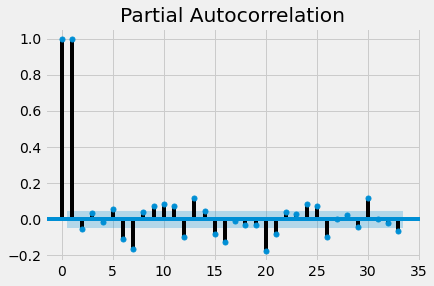

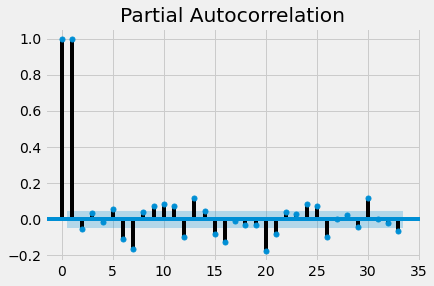

In [91]:
plot_pacf(df.PriceUSD)

In [102]:
model=arch_model(df.PriceUSD,p=2,q=0)

In [103]:
model_fit=model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 11309.631235478453
Iteration:      2,   Func. Count:     12,   Neg. LLF: 11182.938733635667
Iteration:      3,   Func. Count:     18,   Neg. LLF: 11102.969010689281
Iteration:      4,   Func. Count:     24,   Neg. LLF: 11064.997084853703
Iteration:      5,   Func. Count:     30,   Neg. LLF: 11059.141874944064
Iteration:      6,   Func. Count:     36,   Neg. LLF: 11056.118927603125
Iteration:      7,   Func. Count:     42,   Neg. LLF: 11054.980478091013
Iteration:      8,   Func. Count:     48,   Neg. LLF: 11054.955676533229
Iteration:      9,   Func. Count:     54,   Neg. LLF: 11054.954924730042
Iteration:     10,   Func. Count:     60,   Neg. LLF: 11054.954160266836
Iteration:     11,   Func. Count:     66,   Neg. LLF: 11054.950611713492
Iteration:     12,   Func. Count:     72,   Neg. LLF: 11054.9429654713
Iteration:     13,   Func. Count:     78,   Neg. LLF: 11054.920148235713
Iteration:     14,   Func. Count:     84,   Neg. LLF:

In [104]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:               PriceUSD   R-squared:                      -0.672
Mean Model:             Constant Mean   Adj. R-squared:                 -0.672
Vol Model:                       ARCH   Log-Likelihood:               -9280.85
Distribution:                  Normal   AIC:                           18569.7
Method:            Maximum Likelihood   BIC:                           18591.5
                                        No. Observations:                 1733
Date:                Thu, Dec 03 2020   Df Residuals:                     1729
Time:                        20:32:26   Df Model:                            4
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            10.8191      0.189     57.385      0.000 [ 10.450, 11.189]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2163      0.109      1.985  4.717e-02  [2.707e-03,  0.430]
alpha[1]       0.8487      0.118      7.162  7.928e-13    [  0.616,  1.081]
alpha[2]       0.1513      0.120      1.263      0.207 [-8.347e-02,  0.386]
===========================================================================

Covariance estimator: robust
"""

In [105]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = df.PriceUSD[:-(test_size-i)]
    model = arch_model(train, p=2, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

C:\Users\sivay\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\sivay\Anaconda3\lib\site-packages\arch\univariate\base.py:709: ConvergenceWarning: The optimizer returned code 9. The message is:
Iteration limit exceeded
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,


In [106]:

rolling_predictions = pd.Series(rolling_predictions, index=df.PriceUSD.index[-365:])

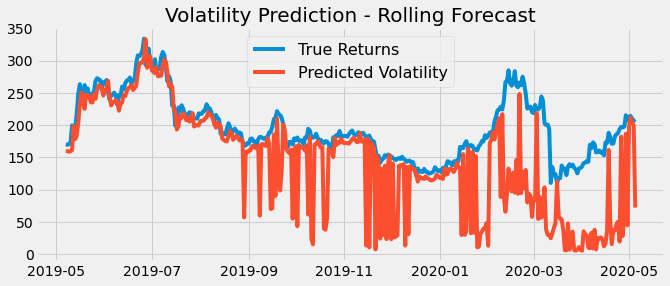

In [107]:
plt.figure(figsize=(10,4))
true, = plt.plot(df.PriceUSD[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [108]:
train = df.PriceUSD
model = arch_model(train, p=2, q=0)
model_fit = model.fit(disp='off')

In [109]:
from datetime import datetime, timedelta
pred = model_fit.forecast(horizon=7)
future_dates = [df.PriceUSD.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

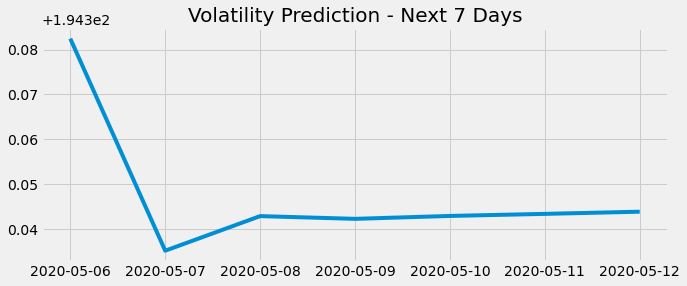

In [110]:

plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)

In [ ]:
#6 #202.7360756
#7 #212.9909728
#8 #212.4131
#9 #210.7749
#10 #187.5424868
#11#185.715372296902
#12 #189.8184594
